<a href="https://colab.research.google.com/github/TamaraMaggioni/DiploDatos2021/blob/main/IntroAprendizajeAutomatico/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X=X[y<50]
y=y[y<50]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

(490, 13) (490,)


((392, 13), (98, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos incluye información sobre distintos barrios 
o suburbios de Boston, Estados Unidos. Es una serie de datos reales de una publicación científica de 1978, en la que dos investigadores se plantearon evaluar la hipótesis de que las personas, potenciales compradoras de viviendas, estaban más dispuestas a pagar por casas cuyos niveles atmosféricos de contaminación fueran bajos. El set incluye 14 columnas (features o variables) y 506 casos (correspondintes a distintas zonas o barrios, denonimadas "towns").
2. La variable a predecir, o la feature target, es el precio de las casas. Esta variable es la columna 14 del dataset (MEDV), y muestra los valores promedio de las casas ocupadas por sus dueños en miles de dólares. Una de las críticas que se le hace a este atributo es que deja afuera todas aquellas casas alquiladas. Además, el valor máximo fue seteado previamente por los invesrigadores en 50 mil dólares, por lo que el conjunto de datos subestima el valor real de las propiedades.
3. Para realizar la predicción contamos con 13 features o atributos: una serie de datos correspondientes a la propiedad misma y otra serie de datos que se corresponde a elementos del entorno donde está emplazada la propiedad. En orden de aparición, estos son:  
        - CRIM: Tasa de crimenes per cápita por barrio;
        - ZN: Proporción de tierras residenciales en lotes que superan los 25 mil pies cuadrados;
        - INDUS: Proporción de hectáreas no destinadas a la actividad industiral o comercial por barrio;
        - CHAS: variable dummy que indica cercanía al río Charles (= 1 camino recorre borde de río; 0 caso contrario)
        - NOX: Concentración de niveles de óxidos nítricos medidos en partes cada 10 millones;
        - RM: Número promedio de habitaciones por vivienda;
        - AGE: Proporción de unidades ocupadas por sus dueños construidas antes de 1940;
        - DIS: Distancia ponderada a 5 centros de empleo de Boston;
        - RAD: Indice de accesibilidad a carreteras radiales;
        - TAX: Tasa de impuesto a la propiedad en valores aboslutos por 10 mil dólares;
        - PTRATIO: Tasa o relación alumno-docente por barrio;
        - B: detalla el resultado de la fórmula 1000(Bk - 0.63)^2, donde Bk es la proporción de "negros" (sic) por barrio;
        - LSTAT: Porcentaje de la población de más bajos recursos.
4. Los atributos relacionados a la propiedad en sí misma probablemente tengan relación más directa con el precio final de la propiedad: número de habitaciones, antiguedad, cantidad de terreno residencial. La combinación de estos features hacen al precio final de la vivienda en el sentido de que casas más grandes, con más terreno y menos antiguas suelen ser más costosas (excepto que los terrenos grandes se ubiquen en zonas desfavorecidas o que el estado de la casa sea muy malo, entre otras). Las variables que miden características del entorno variarán un poco más, ya que dependerán de lo que el comprador valore más en la situación particular en la que se encuentra (tipo de empleo, situación laboral, constitución familiar, apreciación de un entorno más limpio, etc.)
5. Uno de los primeros problemas éticos que salta a la vista en este set de datos es la medición del porcentaje de personas afroamericanas (nombradas como "negros" en la versión original, hoy una palabra despectiva). De todas maneras, llevados al contexto de la época, no es poco razonable pensar en la asociación que se daba por sentada entre personas de tez oscura e índices de cirminalidad o barrios más carenciados. 
Otras cuestiones que pueden influir en un futuro predictor de precios es que los precios mismos de venta fueron limitados en un valor máximo de 50 mil dólares. Esta limitante puede resultar bastante grave al a hora de predecir los valores reales de otras propiedades, ya que subestimará los precios de venta (nos estaría modificando la pendiente de la línea de regresión). Por otra parte, sólo fueron consideradas aquellas viviendas habitadas por sus dueños: se deja fuera de la ecuación a todas las viviendas alquiladas. Esto implica un sesgo en la toma de datos.
Finalmente, no existed datos de ubicacion de las viviendas. En otras palabras: no sabemos con exactitud donde estan ubicadas las viviendas! 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

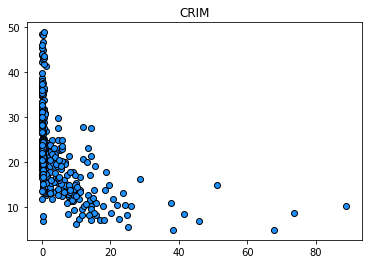

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [ ]:
# Primero, visualizamos los datos mediante un data frame, para hacer un poco mas facil la lectura:
df = pd.DataFrame(boston["data"], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
# Podemos visualizar cada uno de los 13 features de interes de dos maneras: en conjunto o uno por uno. Van las dos formas.
#Visualizacion 'en conjunto':
#sns.pairplot(df)

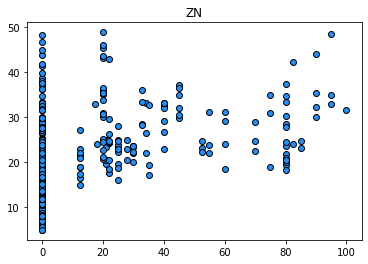

In [ ]:
# De lo contrario, podemos visualizar cada una de las features, una por una. 
# Como la variable CRIM ya fue visualizada en el ejemplo anterior, partimos de las siguientes:

feature = 'ZN'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

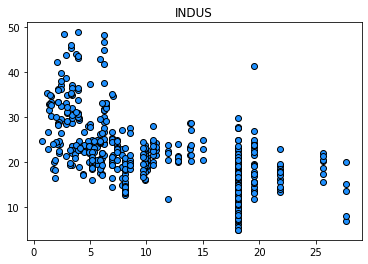

In [ ]:
feature = 'INDUS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

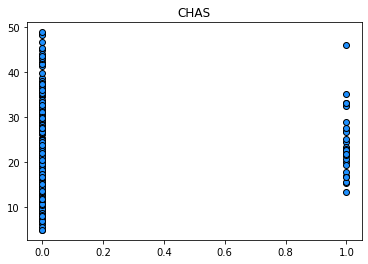

In [ ]:
feature = 'CHAS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

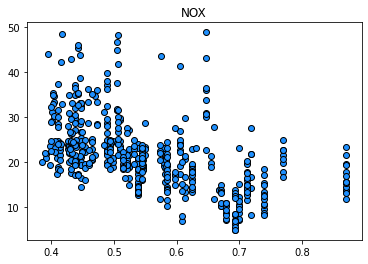

In [ ]:
feature = 'NOX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

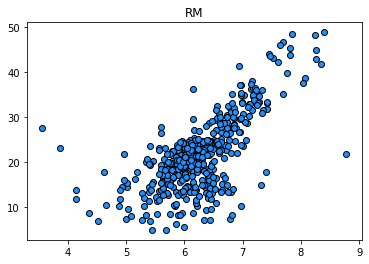

In [ ]:
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

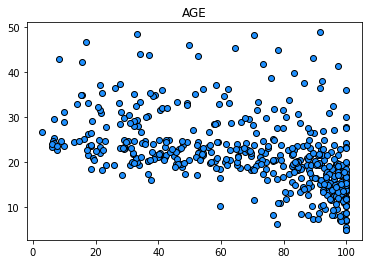

In [ ]:
feature = 'AGE'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

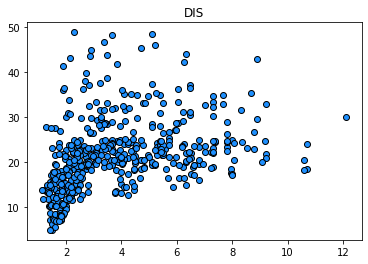

In [ ]:
feature = 'DIS'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

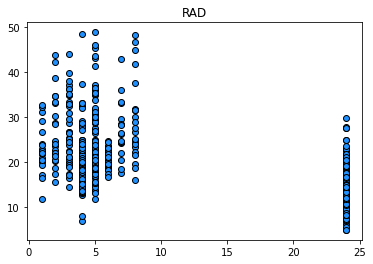

In [ ]:
feature = 'RAD'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

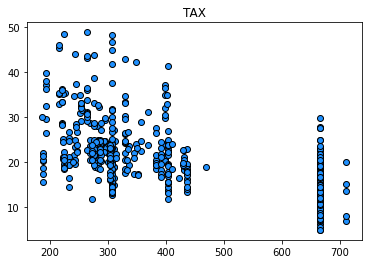

In [ ]:
feature = 'TAX'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

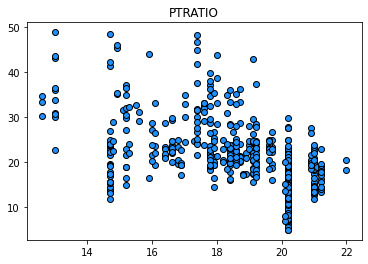

In [ ]:
feature = 'PTRATIO'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

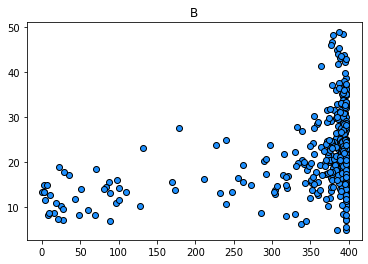

In [ ]:
feature = 'B'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

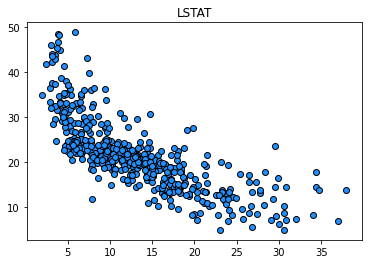

In [ ]:
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

Midiendo a ojo, podemos seleccionar 4 variables que nos parecen las mejores predictoras de los precios de las viviendas:
1. LSTAT
2. RM
3. PTRATIO
4. NOX

Las primeras dos muestran una nube de puntos que se dispersan siguiendo una recta, lo cual es fabuloso para una regresion lineal. Ademas, cada una de estas variables se relaciona de manera inversa (RM muestra pendiente positiva y LSTAT negativa). Como ambas dan información diferente, nos quedamos con las dos. 
Las otras dos variables, PTRATIO Y NOX muestran una nube de puntos un poco menos ajustada a una línea, pero aún así muestran un mismo patrón. Decidimos quedarnos con la varaible PTRATIO. 


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_3 = X_train[:, selector]
X_test_3 = X_test[:, selector]
X_train_3.shape, X_test_3.shape

((392, 1), (98, 1))

In [ ]:
# 2. Entrenar 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degree = 1
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

model.fit(X_train_3, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
# 3. Predecir y evaluar acá.

y_pred = model.predict(X_test_3)

mean_squared_error(y_test, y_pred)

36.6066191547775

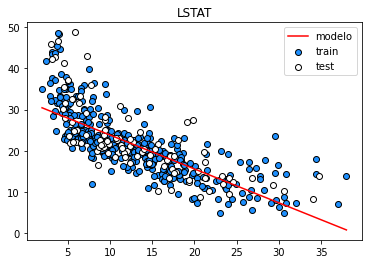

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_3), np.min(X_test_3))
x_end = max(np.max(X_train_3), np.max(X_test_3))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="red", label="modelo")

plt.scatter(X_train_3, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_3, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
selector = (boston['feature_names'] == 'LSTAT') 
X_train_4 = X_train[:, selector]
X_test_4 = X_test[:, selector]
X_train_4.shape, X_test_4.shape

((392, 1), (98, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [ ]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_4, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_4)
    y_test_pred = model.predict(X_test_4)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

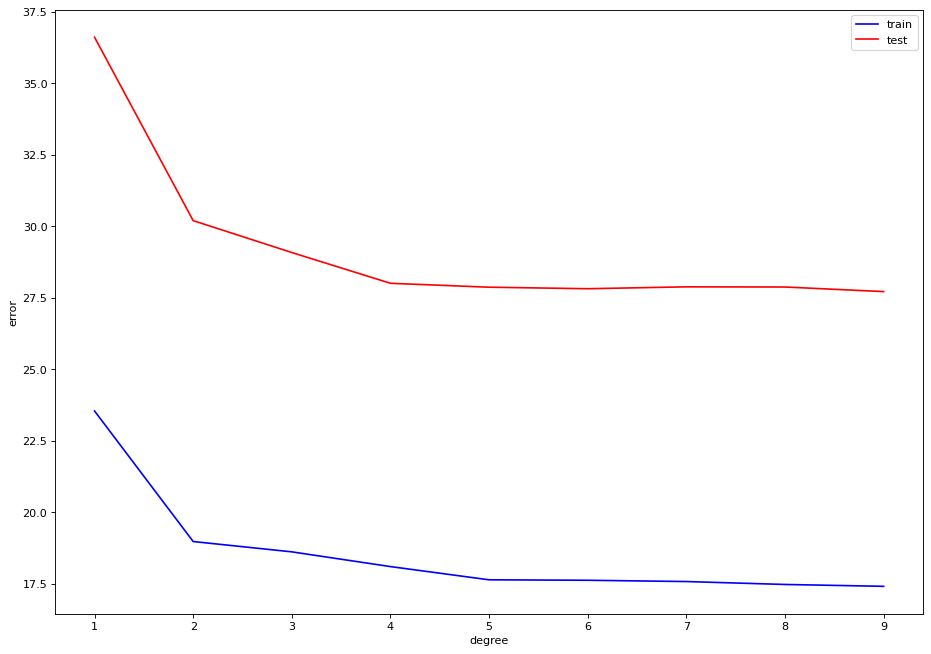

In [ ]:
# 2. Graficar curvas de error acá.
from matplotlib.pyplot import figure
figure(figsize=(14, 10), dpi=80)
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Después de grado 4 de polinomio, el error en X_test deja de disminuir, mientras que sí lo hace para x_train. Esto es una señal de que a partir de este grado, empieza el sobreajuste. Por navaja de ockham, no tiene sentido irs e aun modelo más complejo, si no mejora la métrica en el conjunto de datos de testing.

In [ ]:
pf = PolynomialFeatures(4)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_4, y_train)
y_train_pred = model.predict(X_train_4)
y_test_pred = model.predict(X_test_4)

# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
lr.coef_, lr.coef_.shape, boston['feature_names'][selector], pf.get_feature_names(), 'train error:', train_error, 'test_error', test_error

(array([ 4.80054789e+01, -4.84945443e+00,  3.15945949e-01, -1.02295094e-02,
         1.23056202e-04]),
 (5,),
 array(['LSTAT'], dtype='<U7'),
 ['1', 'x0', 'x0^2', 'x0^3', 'x0^4'],
 'train error:',
 18.105007254915883,
 'test_error',
 28.006339841623486)

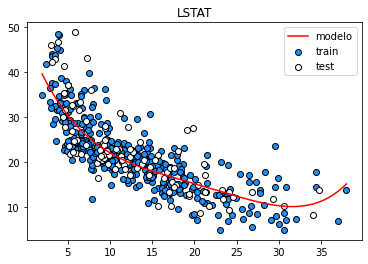

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_4), np.min(X_test_4))
x_end = max(np.max(X_train_4), np.max(X_test_4))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model.predict(x), color="red", label="modelo")

plt.scatter(X_train_4, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_4, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()


Tenemos un modelo que ajusta bastante bien a los datos, pero sólo en el rango de 0 a 35. A partir de ese valor, el modelo predecirá valores demasiado altos (necesitaríamos más datos para comprobarlo).

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

% lower status of the population = LSTAT, pupils = PTRATIO , rooms = RM 

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
X, y = boston['data'], boston['target']
X=X[y<50]
y=y[y<50]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'PTRATIO') | (boston['feature_names'] == 'RM')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((392, 3), (98, 3))

In [ ]:
boston['feature_names'][selector]

array(['RM', 'PTRATIO', 'LSTAT'], dtype='<U7')

In [ ]:
# 2. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [ ]:
pf

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

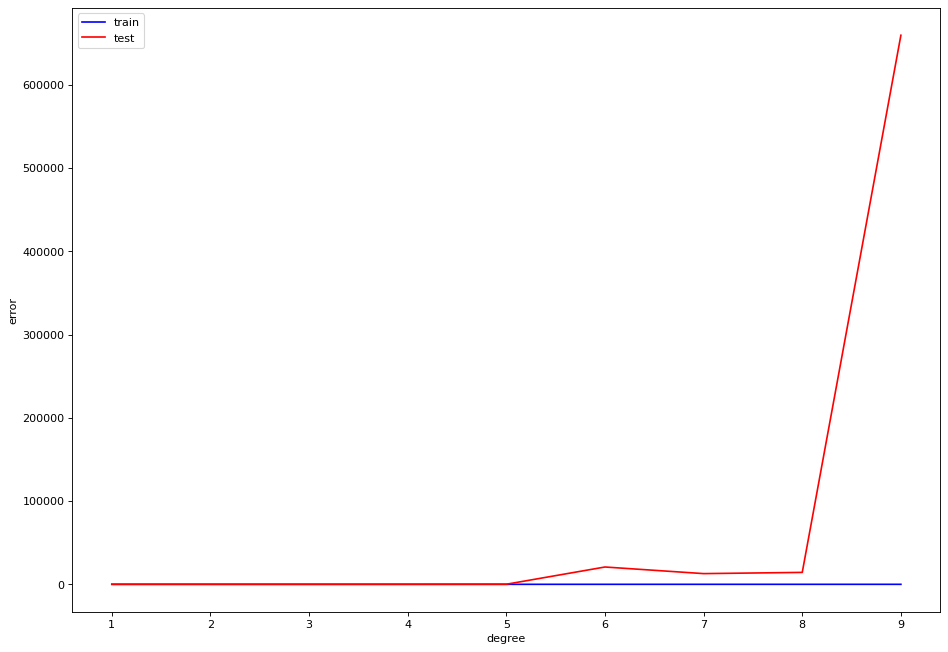

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(14, 10), dpi=80)
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Después de grado 5 de polinomio, para un modelo de regresión múltiple de 3 variables, se nota que se dispara el error en X_test en comparación a la predicción sobre X_train.
Pero qué significado tiene utilizar un modelo de estas caracaterísticas?
Analicemos los coeficientes:

In [ ]:
pf = PolynomialFeatures(5)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_fs, y_train)
lr.coef_, lr.coef_.shape

(array([ 1.03380456e+05, -5.77263813e+04, -5.77123927e+03, -5.56901538e+03,
         1.05336637e+04,  4.41575480e+03,  2.31250193e+03, -2.55060409e+02,
         4.00260086e+02,  3.81021589e+01, -8.52537934e+02, -7.32029139e+02,
        -2.88343607e+02, -7.05821964e+01, -1.72026631e+02, -1.19195653e+01,
         2.43836067e+01, -2.61984560e+00, -2.16137892e+00, -7.48706942e-02,
         2.78184985e+01,  5.01334931e+01,  1.17132209e+01,  1.04111279e+01,
         1.86067223e+01,  5.11035375e-01, -4.52694873e-01,  2.85235987e+00,
         8.41275549e-01,  2.85882353e-02, -6.26009489e-01, -2.64433243e-01,
         1.75201811e-02, -2.28055955e-02,  6.02755269e-03, -7.97736295e-02,
        -1.37673270e+00,  2.53247068e-02, -3.06948988e-01, -6.65859220e-01,
         3.14718667e-02, -5.21079926e-02, -1.55549924e-01, -5.25612710e-02,
         6.87248195e-04,  1.77314164e-02, -1.31288826e-02, -8.00174038e-03,
         7.48771837e-04, -6.98656336e-04,  5.33827693e-03,  4.99871326e-03,
         3.6

Tenemos un modelo con 56 coeficientes elevados a diversas potencias de cada uno de nuestros features. Es completamente incomprensible, y definitivamente overfitteado.
Comparemoslo con un modelo de regresión múltiple de grado 1 

In [ ]:
pf = PolynomialFeatures(1)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train_fs, y_train)
lr.coef_, lr.coef_.shape, boston['feature_names'][selector]

(array([19.81059047,  3.88235108, -0.85618638, -0.51535387]),
 (4,),
 array(['RM', 'PTRATIO', 'LSTAT'], dtype='<U7'))

Este modelo es interpretable. Nos da un plano en 4 dimensiones donde la cantidad de Rooms tiene un coeficiente positivo con el target,  el pupil/teacher ratio tiene una relación negativa y el % de gente de bajo status también.
Era lo esperable para las 3 variables. Una casa con más habitaciones es más cara, una casa en un barrio conbuena educación es más cara (o los barrios caros tienen la mejor educación), y una casa en barrio con poco porcentaje de gente de lower status es más cara también. 

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.




####A todo Feature, grado 1:

In [ ]:
pf = PolynomialFeatures(1)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
lr.coef_, lr.coef_.shape, boston['feature_names'], pf.get_feature_names(), 'train error:', train_error, 'test_error', test_error

(array([ 3.17680685e+01, -1.23123611e-01,  3.72512032e-02, -6.13620827e-02,
         8.04827453e-01, -1.24184863e+01,  3.51627544e+00, -2.59158980e-02,
        -1.23960255e+00,  2.36976688e-01, -1.20241403e-02, -7.43319390e-01,
         7.73325563e-03, -3.45475587e-01]),
 (14,),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 ['1',
  'x0',
  'x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12'],
 'train error:',
 12.613747501833323,
 'test_error',
 18.73571229295009)

####A todo feature, grado 2:

In [ ]:
pf = PolynomialFeatures(2)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
lr.coef_, lr.coef_.shape, boston['feature_names'], pf.get_feature_names(), 'train error:', train_error, 'test_error', test_error

(array([ 2.56818755e+02, -7.17530087e-02, -3.46745248e-01, -2.95165100e+00,
         1.95707852e+01, -1.78359647e+02, -1.82227272e+01,  5.83515993e-01,
        -1.06642875e+01,  3.78630553e+00, -1.80532194e-01, -7.85541094e+00,
        -1.75055020e-01,  9.30214663e-01,  4.26385889e-03,  2.26247790e-02,
         1.75300576e-02,  6.59139800e-01, -1.78708170e+00,  1.10489462e-01,
        -5.13266961e-03,  2.79674404e-02, -1.29702125e-01,  8.14277152e-03,
        -1.00241852e-01, -8.31365862e-05,  6.86907782e-03, -1.94431054e-04,
        -3.58776450e-03, -5.67737993e-02, -9.05802333e-02,  2.73390659e-02,
        -1.34051704e-05, -5.98128182e-03, -1.41907887e-02,  4.19166733e-04,
        -4.13726921e-03,  7.78784343e-04, -3.00208877e-03,  2.94600150e-02,
         8.48566882e-02,  1.97560569e+00,  1.26773883e-02,  2.58975633e-03,
         1.48377724e-01,  1.10775618e-02,  2.83384647e-04, -2.96146026e-02,
         2.47213329e-03, -7.99218941e-03,  1.95707852e+01, -5.60324726e+01,
        -1.4

Comparando con el modelo a todo feature, nuevamente aumentar el grado polinomial lo hace muy difícil de interpretar, y con una gran cantidad de coeficientes cercanos a 0. Analizando el error cuadrático, se puede observar que si bien performa muy bien con los datos de entrenamiento, tiene un error mucho mayor para los datos de test. Está muy sobreajustado. Para el caso de polinomio de grado 1, podemos observar una pequeña disminución del error en comparación al modelo con sólo 3 features. Sin embargo, aumentó la complejidad y la interpretabilidad de nuestro modelo, con lo que difícilmente convenga utilizar un modelo así.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?